<a href="https://colab.research.google.com/github/muhammadalfateh6/-Projects_In_Use/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


In [72]:
import pandas as pd
#index_col='Datetime',
df = pd.read_csv('/content/solarenergy.csv',  parse_dates=True)
df

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
1,02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
2,02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
3,02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
4,02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...,...
116112,01/05/2007 5:00,6445,NaN,NaN,NaN,NaN,NaN,NaN
116113,01/05/2007 4:00,6452,NaN,NaN,NaN,NaN,NaN,NaN
116114,01/05/2007 3:00,6583,NaN,NaN,NaN,NaN,NaN,NaN
116115,01/05/2007 2:00,6803,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df = df.dropna()
df

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
1,02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
2,02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
3,02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
4,02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...,...
2202,03/05/2020 6:00,8333,29,12.9,78.0,9.0,29.90,61.0
2203,03/05/2020 5:00,7825,29,12.9,54.0,14.0,29.90,61.0
2204,03/05/2020 4:00,7743,29,12.9,56.0,17.0,29.91,61.0
2205,03/05/2020 3:00,7971,29,12.9,51.0,18.0,29.88,61.0


In [77]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'] = df['Datetime'].dt.date
df

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,2020-03-08,11385,27,7.5,75.0,8.0,29.82,69.0
1,2020-02-08,12390,27,7.5,77.0,5.0,29.85,69.0
2,2020-02-08,13312,27,7.5,70.0,0.0,29.89,69.0
3,2020-02-08,13832,27,7.5,33.0,0.0,29.91,69.0
4,2020-02-08,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...,...
2202,2020-03-05,8333,29,12.9,78.0,9.0,29.90,61.0
2203,2020-03-05,7825,29,12.9,54.0,14.0,29.90,61.0
2204,2020-03-05,7743,29,12.9,56.0,17.0,29.91,61.0
2205,2020-03-05,7971,29,12.9,51.0,18.0,29.88,61.0


In [80]:
df.set_index('Datetime', inplace=True)
df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-03-08,11385,27,7.5,75.0,8.0,29.82,69.0
2020-02-08,12390,27,7.5,77.0,5.0,29.85,69.0
2020-02-08,13312,27,7.5,70.0,0.0,29.89,69.0
2020-02-08,13832,27,7.5,33.0,0.0,29.91,69.0
2020-02-08,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...
2020-03-05,8333,29,12.9,78.0,9.0,29.90,61.0
2020-03-05,7825,29,12.9,54.0,14.0,29.90,61.0
2020-03-05,7743,29,12.9,56.0,17.0,29.91,61.0


In [151]:
df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-01-06,9679,12,13.4,71.0,10.0,29.96,52.0
2020-01-06,15334,29,12.6,67.0,14.0,30.15,52.0
2020-01-06,15907,29,12.6,64.0,17.0,30.13,52.0
2020-01-06,16605,29,12.6,64.0,18.0,30.10,52.0
2020-01-06,16874,29,12.6,77.0,15.0,30.11,52.0
...,...,...,...,...,...,...,...
2020-12-07,15667,27,13.3,83.0,5.0,30.01,55.0
2020-12-07,15971,32,13.3,80.0,9.0,29.98,55.0
2020-12-07,16183,32,10.6,86.0,11.0,29.94,58.0


In [157]:
duplicated_indices = df.index.duplicated()
df_new = df[~duplicated_indices]
df_new

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-01-06,9679,12,13.4,71.0,10.0,29.96,52.0
2020-01-07,12825,15,6.4,89.0,3.0,30.11,49.0
2020-01-08,11712,28,14.9,81.0,8.0,29.76,62.0
2020-02-06,9966,28,7.3,62.0,10.0,30.13,52.0
2020-02-07,13600,17,3.6,68.0,0.0,30.22,51.0
...,...,...,...,...,...,...,...
2020-11-06,11027,10,10.3,90.0,8.0,29.91,55.0
2020-11-07,14662,28,4.6,80.0,5.0,30.33,60.0
2020-12-05,13328,28,10.1,90.0,5.0,30.14,64.0


<Axes: xlabel='Datetime'>

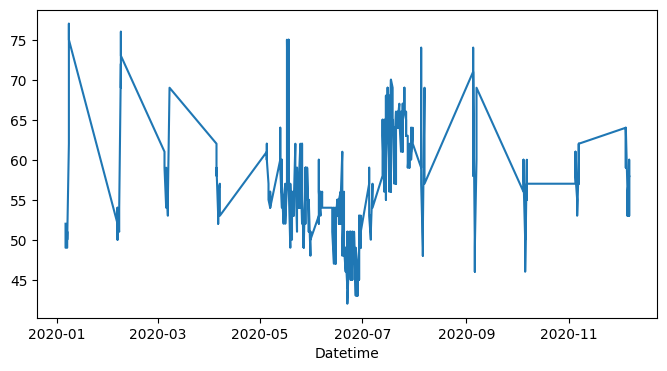

In [81]:
df['temperature'].plot(figsize=(8, 4))

In [82]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [147]:
stepwise_fit = auto_arima(df['temperature'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10281.121, Time=4.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10513.772, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10333.437, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10332.903, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10511.774, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10333.609, Time=1.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10279.154, Time=2.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10331.703, Time=1.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10331.900, Time=0.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10281.105, Time=4.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10333.827, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10281.207, Time=4.52 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10277.156, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10329.708, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2206
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -5134.578
Date:                Wed, 22 Nov 2023   AIC                          10277.156
Time:                        16:40:50   BIC                          10299.950
Sample:                             0   HQIC                         10285.484
                               - 2206                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6710      0.012     58.270      0.000       0.648       0.694
ar.L2          0.2356      0.011     21.165      0.000       0.214       0.257
ma.L1         -0.9888      0.004   -232.514      0.000      -0.997      -0.980
sigma2         6.1652      0.081     76.010      0.000       6.006       6.324
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20190.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                        17.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
train = df.iloc[:-500]
test = df.iloc[-500:]

print(train.shape, test.shape)

(1706, 7) (500, 7)


In [152]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['temperature'], order=(2,1,1))
result = model.fit()

In [153]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperature   No. Observations:                 1706
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3873.813
Date:                Wed, 22 Nov 2023   AIC                           7755.626
Time:                        16:48:38   BIC                           7777.391
Sample:                             0   HQIC                          7763.682
                               - 1706                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6712      0.013     52.317      0.000       0.646       0.696
ar.L2          0.2447      0.013     18.681      0.000       0.219       0.270
ma.L1         -0.9884      0.005   -191.969      0.000      -0.998      -0.978
sigma2         5.5053      0.077     71.566      0.000       5.355       5.656
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17005.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
start = len(train)
end = len(train)+len(test)-1

pred = result.predict(start=start, end=end, typ='levels')
pred.index = df.index[start:end+1]
pred

Datetime
2020-07-26    65.879536
2020-07-26    65.798677
2020-07-26    65.714927
2020-07-26    65.638927
2020-07-26    65.567422
                ...    
2020-12-07    64.567492
2020-12-07    64.567492
2020-12-07    64.567492
2020-12-07    64.567492
2020-12-07    64.567492
Name: predicted_mean, Length: 500, dtype: float64

In [162]:
pred_list = pd.DataFrame(pred)
pred_list

,predicted_mean
Datetime,
2020-07-26,65.879536
2020-07-26,65.798677
2020-07-26,65.714927
2020-07-26,65.638927
2020-07-26,65.567422
...,...
2020-12-07,64.567492
2020-12-07,64.567492
2020-12-07,64.567492


<function matplotlib.pyplot.show(close=None, block=None)>

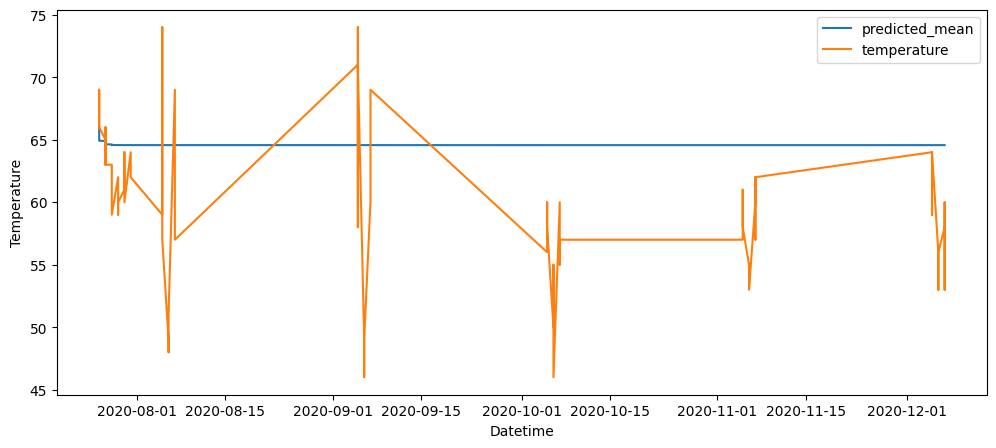

In [164]:
import matplotlib.pyplot as plt

pred.plot(figsize=(12, 5), legend=True)
test['temperature'].plot(legend=True)
plt.ylabel('Temperature')
# plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))
plt.show

In [160]:
test['temperature'].mean()

58.83

In [159]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred, test['temperature']))
rmse

8.172343816021955

In [166]:
model2 = ARIMA(df['temperature'], order=(2,1,1))
model2 = model2.fit()

In [180]:
future_dates = pd.date_range(start='2020-12-07', end='2021-12-07')
pred2 = model2.predict(start=len(df), end=len(df)+365, typ="levels")
pred2.index  = future_dates
pred2

2020-12-07    57.918589
2020-12-08    57.863962
2020-12-09    57.808125
2020-12-10    57.757787
2020-12-11    57.710853
                ...    
2021-12-03    57.128130
2021-12-04    57.128130
2021-12-05    57.128130
2021-12-06    57.128130
2021-12-07    57.128130
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

In [163]:
# future_dates = pd.date_range(start='2020-07-05', end='2021-07-03')
pred2 = result.predict(start=len(df), end=len(df)+363, typ="levels")
# pred2.index  = future_dates
pred2

2206    64.567492
2207    64.567492
2208    64.567492
2209    64.567492
2210    64.567492
          ...    
2565    64.567492
2566    64.567492
2567    64.567492
2568    64.567492
2569    64.567492
Name: predicted_mean, Length: 364, dtype: float64

<Axes: >

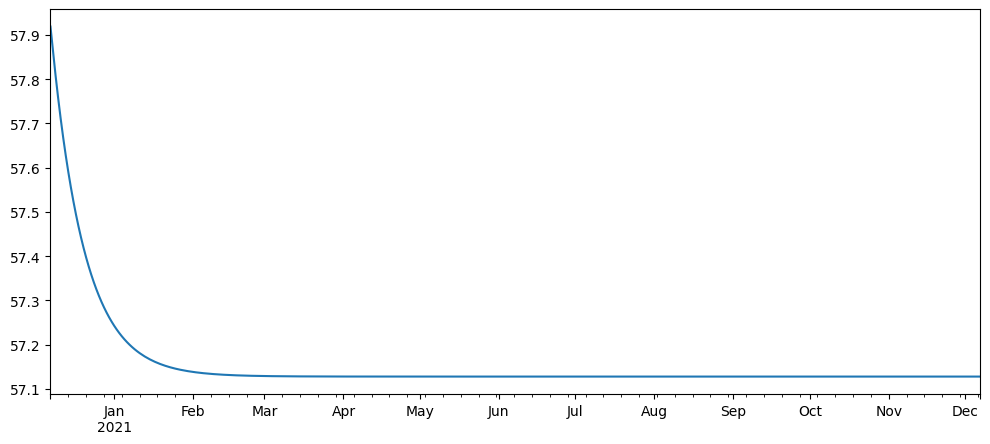

In [183]:
pred2.plot(figsize=(12, 5), legend=False)
